## Import necessary libraries

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df=pd.read_csv('/content/sample_data/ratings.csv',names=['user_id','product_id','rating','timestamp'])
df.head()

,user_id,product_id,rating,timestamp
0,AKM1MP6P0OYPR,132793040,5,1365811200
1,A2CX7LUOHB2NDG,321732944,5,1341100800
2,A2NWSAGRHCP8N5,439886341,1,1367193600
3,A2WNBOD3WNDNKT,439886341,3,1374451200
4,A1GI0U4ZRJA8WN,439886341,1,1334707200


## Dataset overview

In [110]:
df = df.drop('timestamp',axis=1)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1048576 non-null  object
 1   product_id  1048576 non-null  object
 2   rating      1048576 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 24.0+ MB


In [112]:
df.shape

(1048576, 3)

In [113]:
df.describe()

,rating
count,1.048576e+06
mean,3.973380e+00
std,1.399329e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [114]:
len(df.user_id.unique())

786330

In [115]:
len(df.product_id.unique())

61894

In [116]:
len(df.rating.unique())

5

In [117]:
df['rating'].value_counts()

,count
rating,
5,565637
4,208535
1,128251
3,83509
2,62644


In [118]:
df['product_id'].value_counts()

,count
product_id,
B0002L5R78,9487
B0001FTVEK,5345
B000I68BD4,4903
B000BQ7GW8,4275
B00007E7JU,3523
...,...
B00009UT62,1
B00009UT6A,1
B000ARISWK,1


In [119]:
df['user_id'].value_counts()

,count
user_id,
A5JLAU2ARJ0BO,412
A231WM2Z2JL0U3,249
A25HBO5V8S8SEA,164
A6FIAB28IS79,146
AT6CZDCP4TRGA,128
...,...
AR9ZTXD8O45FY,1
A6TPHRQ1GRQF0,1
A1VYUZ9WG1HDWC,1


In [120]:
df.groupby('product_id')['rating'].mean().sort_values(ascending=False)[:6]

,rating
product_id,
059400232X,5.0
B000B8JGXS,5.0
B000B898OA,5.0
B000FDLP3S,5.0
B00006B6ZC,5.0
B00006B70A,5.0


## Visualisation

Rating Distribution




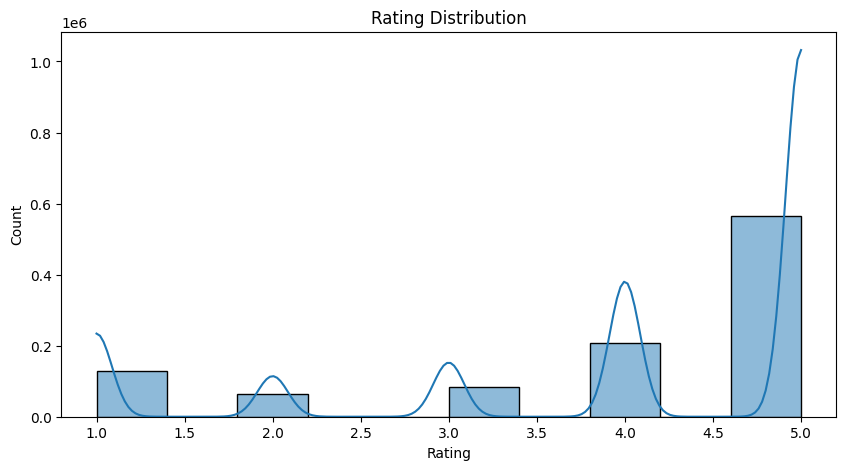

In [121]:
print("Rating Distribution\n\n")
plt.figure(figsize=(10,5))
sns.histplot(df['rating'],bins=10,kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Most Popular Items')

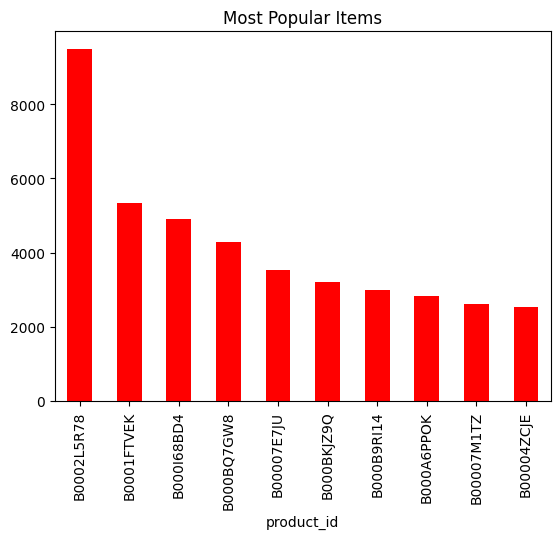

In [122]:
# Most popular items
popular_items = df['product_id'].value_counts().head(10)
popular_items.plot(kind='bar', color = 'red')
plt.title('Most Popular Items')

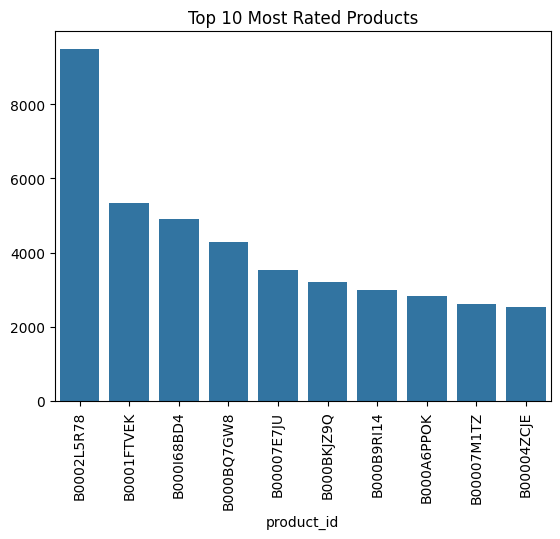

In [123]:
# Most Rated products
top_products = df["product_id"].value_counts().head(10)
sns.barplot(x=top_products.index, y=top_products.values)
plt.xticks(rotation=90)
plt.title("Top 10 Most Rated Products")
plt.show()

## EDA Process

In [124]:
df.isnull().sum()

,0
user_id,0
product_id,0
rating,0


In [125]:
df.duplicated().any()

False

In [126]:
num_users = df["user_id"].nunique()
num_products = df["product_id"].nunique()
num_interactions = len(df)

sparsity = 1 - (num_interactions / (num_users * num_products))
print(f"Sparsity of Rating Matrix: {sparsity * 100}%")

#High sparsity (e.g., >95%) → Need matrix factorization (SVD, ALS) or remove users with very few interactions
#Lower sparsity → User-based or item-based filtering may work

Sparsity of Rating Matrix: 99.99784549990515%


In [127]:
df["Num_Ratings_By_User"] = df.groupby("user_id")["rating"].transform("count")
df["Num_Ratings_By_Item"] = df.groupby("product_id")["rating"].transform("count")

In [128]:
print("Maximum no.of response by a single user:",max(df['Num_Ratings_By_User']))
print("\nMinimum no.of response by a single user:",min(df['Num_Ratings_By_User']))
print("\nMaximum no.of response for a single product:",max(df['Num_Ratings_By_Item']))
print("\nMinimum no.of response for a single product:",min(df['Num_Ratings_By_Item']))

Maximum no.of response by a single user: 412

Minimum no.of response by a single user: 1

Maximum no.of response for a single product: 9487

Minimum no.of response for a single product: 1


In [129]:
df.head()

,user_id,product_id,rating,Num_Ratings_By_User,Num_Ratings_By_Item
0,AKM1MP6P0OYPR,132793040,5,1,1
1,A2CX7LUOHB2NDG,321732944,5,1,1
2,A2NWSAGRHCP8N5,439886341,1,1,3
3,A2WNBOD3WNDNKT,439886341,3,1,3
4,A1GI0U4ZRJA8WN,439886341,1,1,3


In [130]:
filtered_df = df[(df['Num_Ratings_By_User'] >= 30) & (df['Num_Ratings_By_Item'] >= 30)]
filtered_df = filtered_df.reset_index(drop=True)

In [131]:
filtered_df.shape

(4019, 5)

In [132]:
filtered_df.head()

,user_id,product_id,rating,Num_Ratings_By_User,Num_Ratings_By_Item
0,A2ZR3YTMEEIIZ4,1400532655,5,42,484
1,A5JLAU2ARJ0BO,1400532655,1,412,484
2,ALUNVOQRXOZIA,1400599997,1,53,222
3,A680RUE1FDO8B,B000001OMI,5,78,52
4,A1T1YSCDW0PD25,B00000DM9W,5,37,332


In [133]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [134]:
matrix=filtered_df.pivot(index='user_id',columns='product_id',values='rating').fillna(0)
matrix.shape

(141, 2255)

In [135]:
sparse_matrix = csr_matrix(matrix.values)

In [136]:
dense_array = sparse_matrix.toarray()
dense_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 4., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
sparse_df = pd.DataFrame(dense_array, columns=matrix.columns,index=matrix.index)
sparse_df.head()

product_id,1400532655,1400599997,B000001OMI,B00000DM9W,B00000IGBF,B00000J05A,B00000J061,B00000J08C,B00000J0D5,B00000J1E6,...,B000IBNXX2,B000IBRX4M,B000ICZZJG,B000ID6DTG,B000ID7QNI,B000IDCDZY,B000IDWDKO,B000IE8Z4Q,B000IF4788,B000IF51UQ
user_id,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11ED8O95W2103,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A11KZ906QD08C5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DLJESJKM1OQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1435P5AMCPB3X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Computing similarities

## Cosine_Similarity

### Product_Based

In [138]:
df1 = filtered_df.pivot_table(index='product_id',columns='user_id',values='rating')
df1.fillna(0,axis=1,inplace=True)
df1.head()

user_id,A11D1KHM7DVOQK,A11ED8O95W2103,A11KZ906QD08C5,A12DLJESJKM1OQ,A1435P5AMCPB3X,A149RNR5RH19YY,A14JBDSWKPKTZA,A1522TN5FVJL0Y,A15QYHQH80W30L,A17BUUBOU0598B,...,ARXU3FESTWMJJ,ASCM3206SVTO0,AT28RL25Q2OLK,AT2J7H5TRZM8Z,AT6CZDCP4TRGA,AT8TIN5JKHO2V,ATDE9JYCPI0L1,AWPODHOB4GFWL,AY8Q1X7G96HV5,AZ0SIZRQWN7RC
product_id,,,,,,,,,,,,,,,,,,,,,
1400532655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400599997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000001OMI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000DM9W,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00000IGBF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
cos_similar = cosine_similarity(df1)

In [140]:
cos_similar.shape

(2255, 2255)

In [141]:
cos_similar[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [142]:
df1.index

Index(['1400532655', '1400599997', 'B000001OMI', 'B00000DM9W', 'B00000IGBF',
       'B00000J05A', 'B00000J061', 'B00000J08C', 'B00000J0D5', 'B00000J1E6',
       ...
       'B000IBNXX2', 'B000IBRX4M', 'B000ICZZJG', 'B000ID6DTG', 'B000ID7QNI',
       'B000IDCDZY', 'B000IDWDKO', 'B000IE8Z4Q', 'B000IF4788', 'B000IF51UQ'],
      dtype='object', name='product_id', length=2255)

In [143]:
def recommended_movie(product_name):
    if product_name in df1.index:
        index = np.where(product_name==df1.index)[0][0]
        similar = sorted(list(enumerate(cos_similar[index])),reverse=True,key=lambda x: x[1])[1:6]
        print(f'Recommended product of {product_name}')
        #print('Recommended product of'product_name)
        print('-'*40)
        for product in similar:
            print(df1.index[product[0]])
    else:
        print('Product is not found!!!')

In [144]:
Predict = recommended_movie('1400532655')
Predict

Recommended product of 1400532655
----------------------------------------
B00006HYM3
B000093IRC
B0001CFSX6
B0001D3JXG
B0001D3K3A


## Clustering Algorithms

In [145]:
std=StandardScaler()
scaled_matrix=std.fit_transform(matrix)

In [146]:
scaled_matrix=pd.DataFrame(scaled_matrix,columns=matrix.columns,index=matrix.index)
scaled_matrix.head()

product_id,1400532655,1400599997,B000001OMI,B00000DM9W,B00000IGBF,B00000J05A,B00000J061,B00000J08C,B00000J0D5,B00000J1E6,...,B000IBNXX2,B000IBRX4M,B000ICZZJG,B000ID6DTG,B000ID7QNI,B000IDCDZY,B000IDWDKO,B000IE8Z4Q,B000IF4788,B000IF51UQ
user_id,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,-0.099586,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515
A11ED8O95W2103,-0.099586,-0.084515,-0.084515,5.852350,-0.084515,-0.084515,5.852350,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515
A11KZ906QD08C5,-0.099586,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515
A12DLJESJKM1OQ,-0.099586,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515
A1435P5AMCPB3X,-0.099586,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515


### K-Means Clustering

In [147]:
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans_cluster=kmeans.fit(scaled_matrix)

In [148]:
kmeans_matrix=scaled_matrix
kmeans_matrix['cluster']=kmeans_cluster.labels_
kmeans_matrix.head()

product_id,1400532655,1400599997,B000001OMI,B00000DM9W,B00000IGBF,B00000J05A,B00000J061,B00000J08C,B00000J0D5,B00000J1E6,...,B000IBRX4M,B000ICZZJG,B000ID6DTG,B000ID7QNI,B000IDCDZY,B000IDWDKO,B000IE8Z4Q,B000IF4788,B000IF51UQ,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,-0.099586,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515,4
A11ED8O95W2103,-0.099586,-0.084515,-0.084515,5.852350,-0.084515,-0.084515,5.852350,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515,4
A11KZ906QD08C5,-0.099586,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515,4
A12DLJESJKM1OQ,-0.099586,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515,4
A1435P5AMCPB3X,-0.099586,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515,4


In [149]:
labels = kmeans.fit_predict(matrix)
labels


array([2, 2, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 4, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [150]:
kmeans_cluster.cluster_centers_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.08166817e-17, -8.67361738e-19, -1.38777878e-17, ...,
         2.27272727e-01,  1.81818182e-01, -3.46944695e-18],
       [ 4.38596491e-02,  8.77192982e-03,  4.38596491e-02, ...,
         5.26315789e-02,  3.50877193e-02,  3.50877193e-02],
       [ 5.00000000e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

### Elbow graph approch to find most appropriate number of clusters

In [151]:
inertia=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(scaled_matrix)
  inertia.append(kmeans.inertia_)
print(inertia)

[318030.75886524783, 315875.0248784159, 305464.5954451847, 302017.7423192277, 307966.074322481, 302789.2765609752, 292373.0815337407, 284570.5688248392, 281348.4121189469, 276221.9149106321]


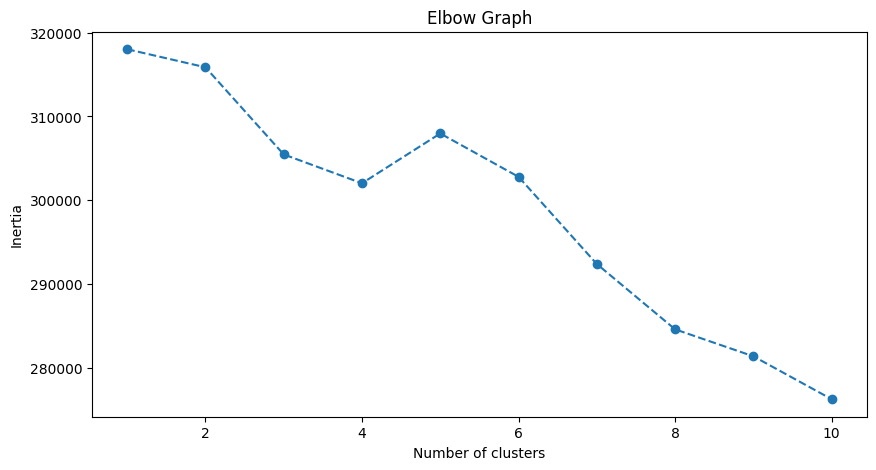

In [152]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),inertia,marker='o',linestyle='--')
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [153]:
kmeans1=KMeans(n_clusters=6,random_state=42)
kmeans_cluster1=kmeans1.fit(scaled_matrix)
kmeans_matrix1=scaled_matrix
kmeans_matrix1['cluster']=kmeans_cluster1.labels_
kmeans_matrix1.head()

product_id,1400532655,1400599997,B000001OMI,B00000DM9W,B00000IGBF,B00000J05A,B00000J061,B00000J08C,B00000J0D5,B00000J1E6,...,B000IBRX4M,B000ICZZJG,B000ID6DTG,B000ID7QNI,B000IDCDZY,B000IDWDKO,B000IE8Z4Q,B000IF4788,B000IF51UQ,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,-0.099586,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515,4
A11ED8O95W2103,-0.099586,-0.084515,-0.084515,5.852350,-0.084515,-0.084515,5.852350,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515,4
A11KZ906QD08C5,-0.099586,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515,4
A12DLJESJKM1OQ,-0.099586,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515,4
A1435P5AMCPB3X,-0.099586,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.170872,-0.084515,-0.084515,-0.084515,...,-0.084515,-0.084515,-0.084515,-0.084515,-0.116321,-0.084515,-0.139431,-0.119952,-0.084515,4


In [154]:
kmeans_cluster1.cluster_centers_

array([[-9.95859195e-02, -8.45154255e-02, -8.45154255e-02, ...,
        -1.19952029e-01, -8.45154255e-02,  0.00000000e+00],
       [-9.95859195e-02, -8.45154255e-02, -8.45154255e-02, ...,
        -1.19952029e-01, -8.45154255e-02,  1.00000000e+00],
       [ 5.64320211e-02,  7.09929574e-01, -8.45154255e-02, ...,
         4.43822506e-01, -8.45154255e-02,  2.00000000e+00],
       [-9.95859195e-02, -8.45154255e-02, -8.45154255e-02, ...,
        -1.19952029e-01, -8.45154255e-02,  3.00000000e+00],
       [-3.67325113e-03, -8.45154255e-02,  1.31622384e-02, ...,
        -5.06354876e-02,  1.31622384e-02,  4.00000000e+00],
       [-9.95859195e-02, -8.45154255e-02, -8.45154255e-02, ...,
        -1.19952029e-01, -8.45154255e-02,  4.00000000e+00]])

In [155]:
pca=PCA(n_components=2)
scaled_matrix_pca=pca.fit_transform(scaled_matrix)
scaled_matrix_pcad=pd.DataFrame(scaled_matrix_pca,columns=['PC1','PC2'])
scaled_matrix_pcad['k-Means']=kmeans_cluster1.labels_
scaled_matrix_pcad.head()

,PC1,PC2,k-Means
0,-0.928943,-1.695629,4
1,-0.522592,-1.156451,4
2,-1.521592,-1.471357,4
3,-0.159337,0.219485,4
4,-0.251137,-1.595095,4


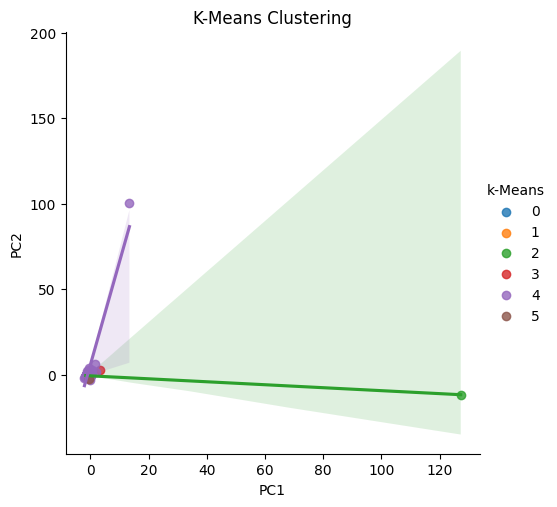

In [156]:
sns.lmplot(x='PC1',y='PC2',data=scaled_matrix_pcad,hue='k-Means')
plt.title('K-Means Clustering')
plt.show()

### Hierarchical Clustering

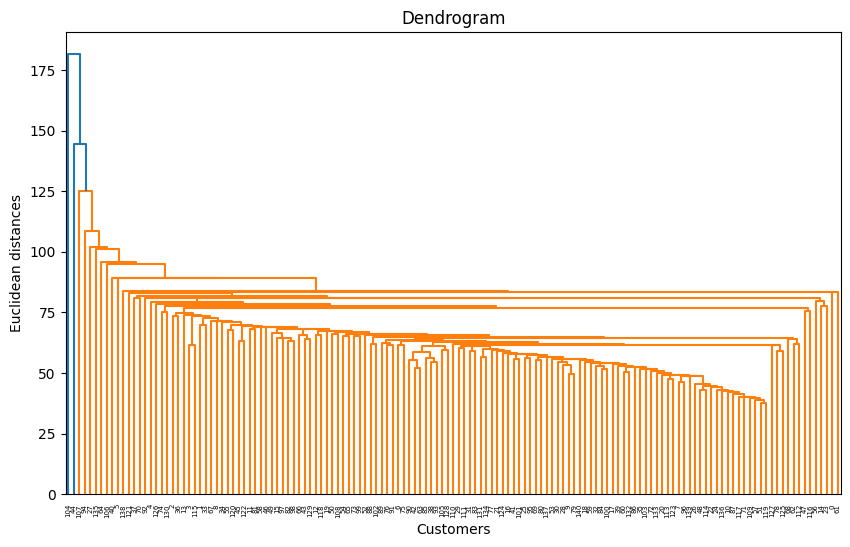

In [157]:
plt.figure(figsize=(10,6))
dendrogram=sch.dendrogram(sch.linkage(scaled_matrix,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [158]:
agg=AgglomerativeClustering(n_clusters=5)
hierarchical_cluster=agg.fit(scaled_matrix)

In [159]:
scaled_matrix_pcad['Hierarchial']=hierarchical_cluster.labels_
scaled_matrix_pcad.head()

,PC1,PC2,k-Means,Hierarchial
0,-0.928943,-1.695629,4,0
1,-0.522592,-1.156451,4,0
2,-1.521592,-1.471357,4,0
3,-0.159337,0.219485,4,0
4,-0.251137,-1.595095,4,0


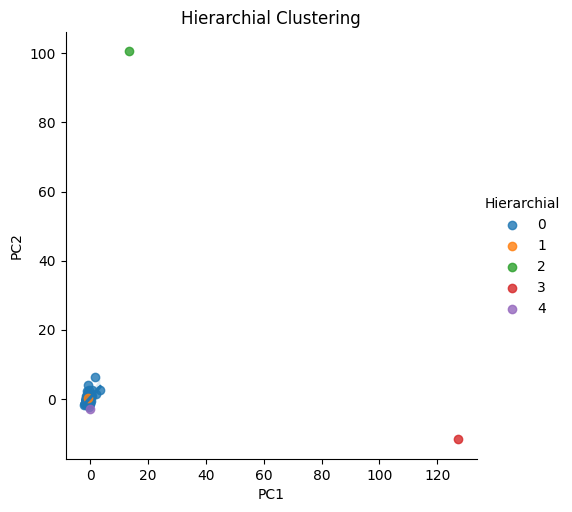

In [160]:
sns.lmplot(data=scaled_matrix_pcad,x='PC1',y='PC2',hue='Hierarchial')
plt.title('Hierarchial Clustering')
plt.show()

### DBSCAN

In [161]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

eps = [0.1, 0.2, 0.3, 0.4, 0.5]
min_node = range(1, 11)
sil_score = []

for ep in eps:
    for mn in min_node:
        db = DBSCAN(eps=ep, min_samples=mn).fit(scaled_matrix)
        labels = db.labels_

        # Number of actual clusters (excluding noise)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            try:
                score = silhouette_score(scaled_matrix, labels)
                sil_score.append([ep, mn, score])
            except ValueError as e:
                print(f"Silhouette score error at eps={ep}, min_samples={mn}: {e}")
        else:
            print(f"Skipped eps={ep}, min_samples={mn} — too few clusters (n={n_clusters})")

Silhouette score error at eps=0.1, min_samples=1: Number of labels is 141. Valid values are 2 to n_samples - 1 (inclusive)
Skipped eps=0.1, min_samples=2 — too few clusters (n=0)
Skipped eps=0.1, min_samples=3 — too few clusters (n=0)
Skipped eps=0.1, min_samples=4 — too few clusters (n=0)
Skipped eps=0.1, min_samples=5 — too few clusters (n=0)
Skipped eps=0.1, min_samples=6 — too few clusters (n=0)
Skipped eps=0.1, min_samples=7 — too few clusters (n=0)
Skipped eps=0.1, min_samples=8 — too few clusters (n=0)
Skipped eps=0.1, min_samples=9 — too few clusters (n=0)
Skipped eps=0.1, min_samples=10 — too few clusters (n=0)
Silhouette score error at eps=0.2, min_samples=1: Number of labels is 141. Valid values are 2 to n_samples - 1 (inclusive)
Skipped eps=0.2, min_samples=2 — too few clusters (n=0)
Skipped eps=0.2, min_samples=3 — too few clusters (n=0)
Skipped eps=0.2, min_samples=4 — too few clusters (n=0)
Skipped eps=0.2, min_samples=5 — too few clusters (n=0)
Skipped eps=0.2, min_samp

In [162]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=5)  # You can tweak eps and min_samples
dbscan_cluster.fit(scaled_matrix_pcad)

DBSCAN()

In [163]:
sil=pd.DataFrame(sil_score)

In [164]:
scaled_matrix_pcad['DBSCAN']= dbscan_cluster.labels_
scaled_matrix_pcad.head()

,PC1,PC2,k-Means,Hierarchial,DBSCAN
0,-0.928943,-1.695629,4,0,0
1,-0.522592,-1.156451,4,0,0
2,-1.521592,-1.471357,4,0,0
3,-0.159337,0.219485,4,0,-1
4,-0.251137,-1.595095,4,0,0


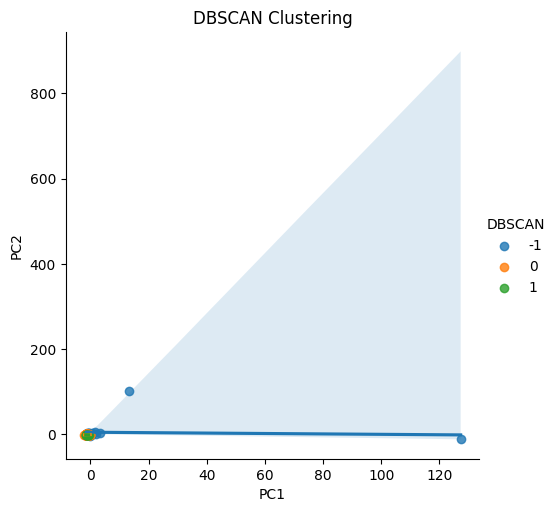

In [165]:
sns.lmplot(data=scaled_matrix_pcad,x='PC1',y='PC2',hue='DBSCAN')
plt.title('DBSCAN Clustering')
plt.show()

## Comparing the performance of each model to find most appropriate model

In [166]:
print('KMeans Model Silhouette Score : ',silhouette_score(scaled_matrix,kmeans_cluster.labels_))
print('\nKMeans Model Silhouette Score after using elbow method : ',silhouette_score(scaled_matrix,kmeans_cluster1.labels_))
print('\nHierarchial Clustering Silhouette Score : ',silhouette_score(scaled_matrix,hierarchical_cluster.labels_))

KMeans Model Silhouette Score :  0.008063547942314822

KMeans Model Silhouette Score after using elbow method :  -0.09248551760211147

Hierarchial Clustering Silhouette Score :  0.2847229333751822


In [167]:
print('\nDBSCAN Silhouette Score : ',silhouette_score(scaled_matrix,dbscan_cluster.labels_))


DBSCAN Silhouette Score :  -0.02636846177569558


In [168]:
import pickle
file = 'Product_Recommendation.pkl'

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [107]:
pickle.dump(Predict,open(file,'wb'))                 #wb = Write byte